In [2]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 02:25:49,739] A new study created in memory with name: no-name-f0210205-e3f2-4d74-8cf1-14d2c3670812
[I 2025-04-27 02:25:49,834] Trial 0 finished with value: 0.9290543259557345 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 20, 'p': 1}. Best is trial 0 with value: 0.9290543259557345.
[I 2025-04-27 02:25:49,929] Trial 1 finished with value: 0.9348088531187123 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 31, 'p': 2}. Best is trial 1 with value: 0.9348088531187123.
[I 2025-04-27 02:25:50,083] Trial 2 finished with value: 0.9261569416498995 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 41, 'p': 1}. Best is trial 1 with value: 0.9348088531187123.
[I 2025-04-27 02:25:50,237] Trial 3 finished with value: 0.9260764587525152 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 10, 'p': 1}. Best i

Best trial:
Accuracy: 0.960241448692153
Best hyperparameters:  {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 11, 'p': 1}


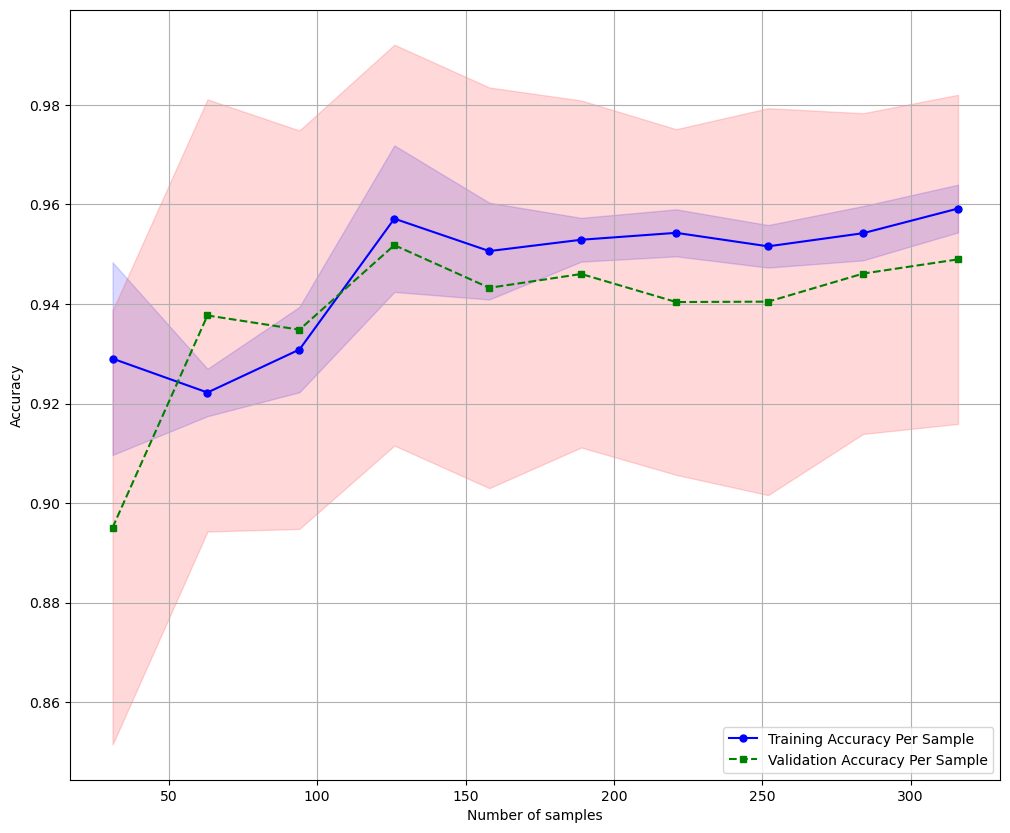

Confusion Matrix
[[ 55   9]
 [  3 104]]
Accuracy: 0.9298, Precision: 0.9204, Recall: 0.9720, F1: 0.9455, AUC:0.9498


In [6]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)

df_train = X_train.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

helper.train_and_evaluate_model('svc', df_train_outlier_removed.iloc[:,:-1], X_test, df_train_outlier_removed.iloc[:,-1], y_test)